<a href="https://colab.research.google.com/github/Julio-sourc/DataScience/blob/main/RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import sweetviz as sv # !pip install sweetviz

# para modelagem
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [160]:
rh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciências de dados/Human_Resources.csv')

In [161]:

rh.shape

(1470, 35)

In [162]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [163]:
#passando as Colunas para portugês
rh = rh.rename(columns={'Age': 'Idade', 'Attrition': 'Desgaste', 'BusinessTravel': 'Viagem_negocio', 'DailyRate': 'Diaria', 'Department': 'Departamento',
                        'DistanceFromHome': 'Distancia_casa', 'Education': 'Educacao', 'EducationField': 'Campo_educacao', 'EmployeeCount': 'Contagem_funcionario',
                        'EmployeeNumber': 'Numero_funcionario', 'EnvironmentSatisfaction': 'Ambiente_satisfacao', 'Gender': 'Genero', 'HourlyRate': 'Taxa_hora',
                        'JobInvolvement': 'Envolvimento', 'JobLevel': 'Nivel_trabalho', 'JobRole': 'Cargo', 'JobSatisfaction': 'Satisfacao_trabalho', 'MaritalStatus': 'Estado_civil',
                        'MonthlyIncome': 'Renda_mensal', 'MonthlyRate': 'Por_mes', 'NumCompaniesWorked': 'Num_empresas_trabalhou', 'Over18': "Maior_dezoito", 'OverTime': 'Hora_extra', 
                        'PercentSalaryHike': 'Aumento_percentual_salario', 'PerformanceRating': 'Desempenho_avaliacao', 'RelationshipSatisfaction': 'Relacao_satisfacao',
                        'StandardHours': 'Horas_padrao', 'StockOptionLevel': 'Acao_bolsa_valores', 'TotalWorkingYears': 'Total_trabalho_ano', 'TrainingTimesLastYear': 'Treinamento_durante_ano',
                        'WorkLifeBalance': 'Equilibrio_traba_vida', 'YearsAtCompany': 'Ano_na_empresa', 'YearsInCurrentRole': 'Ano_na_mesma_func', 'YearsSinceLastPromotion': 'Ano_ultima_promocao', 
                        'YearsWithCurrManager': 'Ano_mesmo_gerente'})

In [164]:
rh.columns

Index(['Idade', 'Desgaste', 'Viagem_negocio', 'Diaria', 'Departamento',
       'Distancia_casa', 'Educacao', 'Campo_educacao', 'Contagem_funcionario',
       'Numero_funcionario', 'Ambiente_satisfacao', 'Genero', 'Taxa_hora',
       'Envolvimento', 'Nivel_trabalho', 'Cargo', 'Satisfacao_trabalho',
       'Estado_civil', 'Renda_mensal', 'Por_mes', 'Num_empresas_trabalhou',
       'Maior_dezoito', 'Hora_extra', 'Aumento_percentual_salario',
       'Desempenho_avaliacao', 'Relacao_satisfacao', 'Horas_padrao',
       'Acao_bolsa_valores', 'Total_trabalho_ano', 'Treinamento_durante_ano',
       'Equilibrio_traba_vida', 'Ano_na_empresa', 'Ano_na_mesma_func',
       'Ano_ultima_promocao', 'Ano_mesmo_gerente'],
      dtype='object')

In [165]:
rh.shape

(1470, 35)

In [166]:
rh.head()

,Idade,Desgaste,Viagem_negocio,Diaria,Departamento,Distancia_casa,Educacao,Campo_educacao,Contagem_funcionario,Numero_funcionario,Ambiente_satisfacao,Genero,Taxa_hora,Envolvimento,Nivel_trabalho,Cargo,Satisfacao_trabalho,Estado_civil,Renda_mensal,Por_mes,Num_empresas_trabalhou,Maior_dezoito,Hora_extra,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [167]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Idade                       1470 non-null   int64 
 1   Desgaste                    1470 non-null   object
 2   Viagem_negocio              1470 non-null   object
 3   Diaria                      1470 non-null   int64 
 4   Departamento                1470 non-null   object
 5   Distancia_casa              1470 non-null   int64 
 6   Educacao                    1470 non-null   int64 
 7   Campo_educacao              1470 non-null   object
 8   Contagem_funcionario        1470 non-null   int64 
 9   Numero_funcionario          1470 non-null   int64 
 10  Ambiente_satisfacao         1470 non-null   int64 
 11  Genero                      1470 non-null   object
 12  Taxa_hora                   1470 non-null   int64 
 13  Envolvimento                1470 non-null   int6

In [168]:
#Visualizando Estátistica
rh.describe()

,Idade,Diaria,Distancia_casa,Educacao,Contagem_funcionario,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [169]:
#Função lambda para converter valores object das colunas para numericos 0 e 1
rh['Desgaste'] = rh['Desgaste'].apply(lambda x:1 if x == 'Yes' else 0)
rh['Hora_extra'] = rh['Hora_extra'].apply(lambda x:1 if x == 'Yes' else 0)
rh['Maior_dezoito'] = rh['Maior_dezoito'].apply(lambda x:1 if x == 'Yes' else 0)

In [170]:
rh.head()

,Idade,Desgaste,Viagem_negocio,Diaria,Departamento,Distancia_casa,Educacao,Campo_educacao,Contagem_funcionario,Numero_funcionario,Ambiente_satisfacao,Genero,Taxa_hora,Envolvimento,Nivel_trabalho,Cargo,Satisfacao_trabalho,Estado_civil,Renda_mensal,Por_mes,Num_empresas_trabalhou,Maior_dezoito,Hora_extra,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


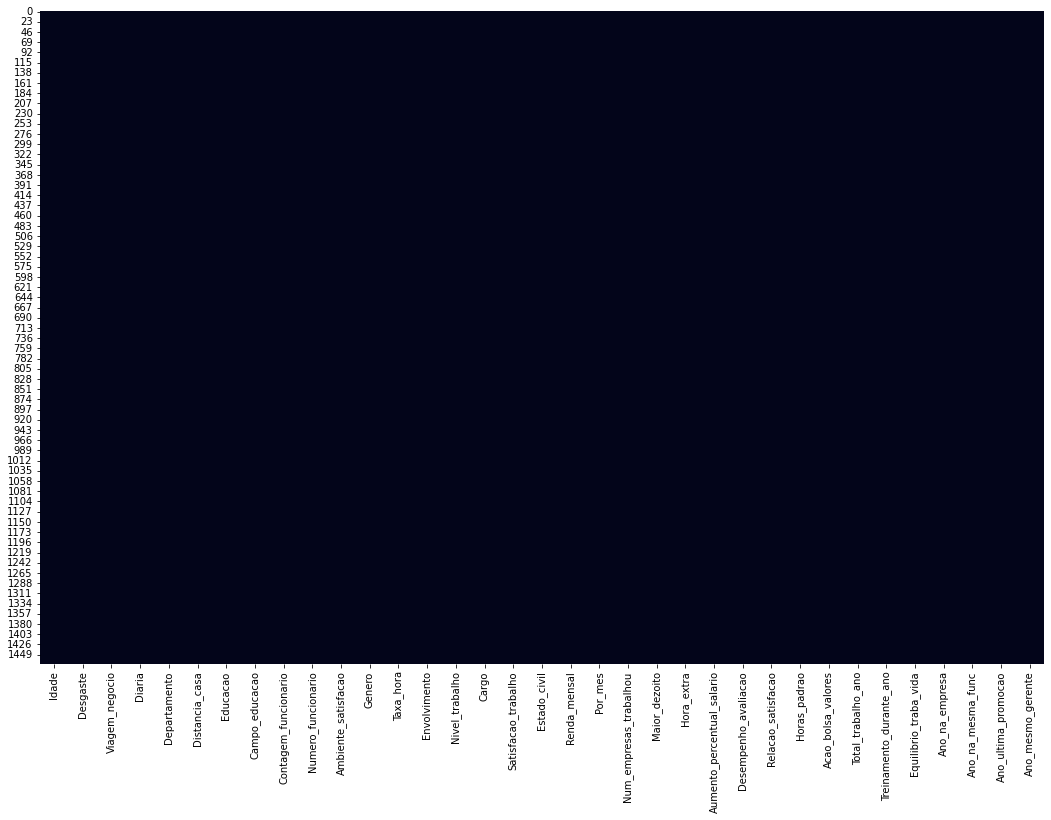

In [171]:
#Verificando se há valores nulos
plt.subplots(figsize = (18,12))
sns.heatmap(rh.isnull(), cbar = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48bf57e9d0>,
      dtype=object)

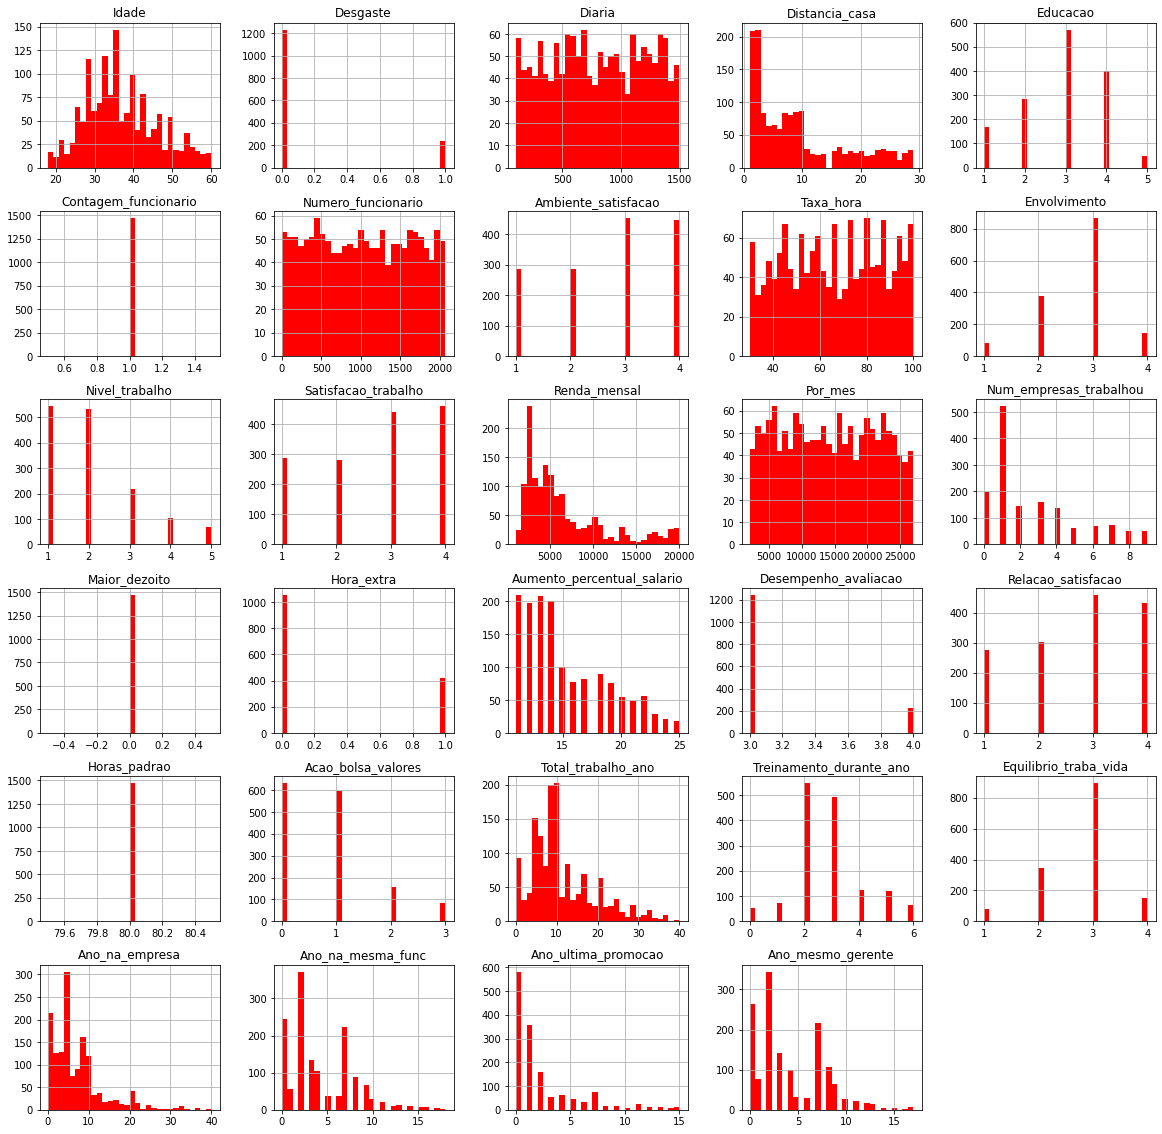

In [172]:
rh.hist(bins = 30, figsize=(20,20), color = 'r')

In [173]:
rh.drop(['Maior_dezoito', 'Contagem_funcionario', 'Hora_extra'], axis= 1, inplace=True)

In [174]:
rh.shape

(1470, 32)

# Análise de dados de pessoas que saíram

In [175]:
sairam = rh[rh['Desgaste'] == 1]
ficaram = rh [rh['Desgaste'] == 0]

In [176]:
print('Total =', len(rh))
print('Número de funcionários que saíram da empresa = ', len(sairam))
print('Porcentagem de funcinários que saíram da empresa= ', (len(sairam) / len(ficaram)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(ficaram))
print('POrcentagem de funcionários que ficaram na empresa =', (len(ficaram) / len(ficaram)) * 100)

Total = 1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcinários que saíram da empresa=  19.22141119221411
Número de funcionários que ficaram na empresa =  1233
POrcentagem de funcionários que ficaram na empresa = 100.0


In [177]:
#estatisica de quem saiu
sairam.describe()


,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [178]:
#estatistica de pessoas que ficaram
ficaram.describe()

,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


# Correlação

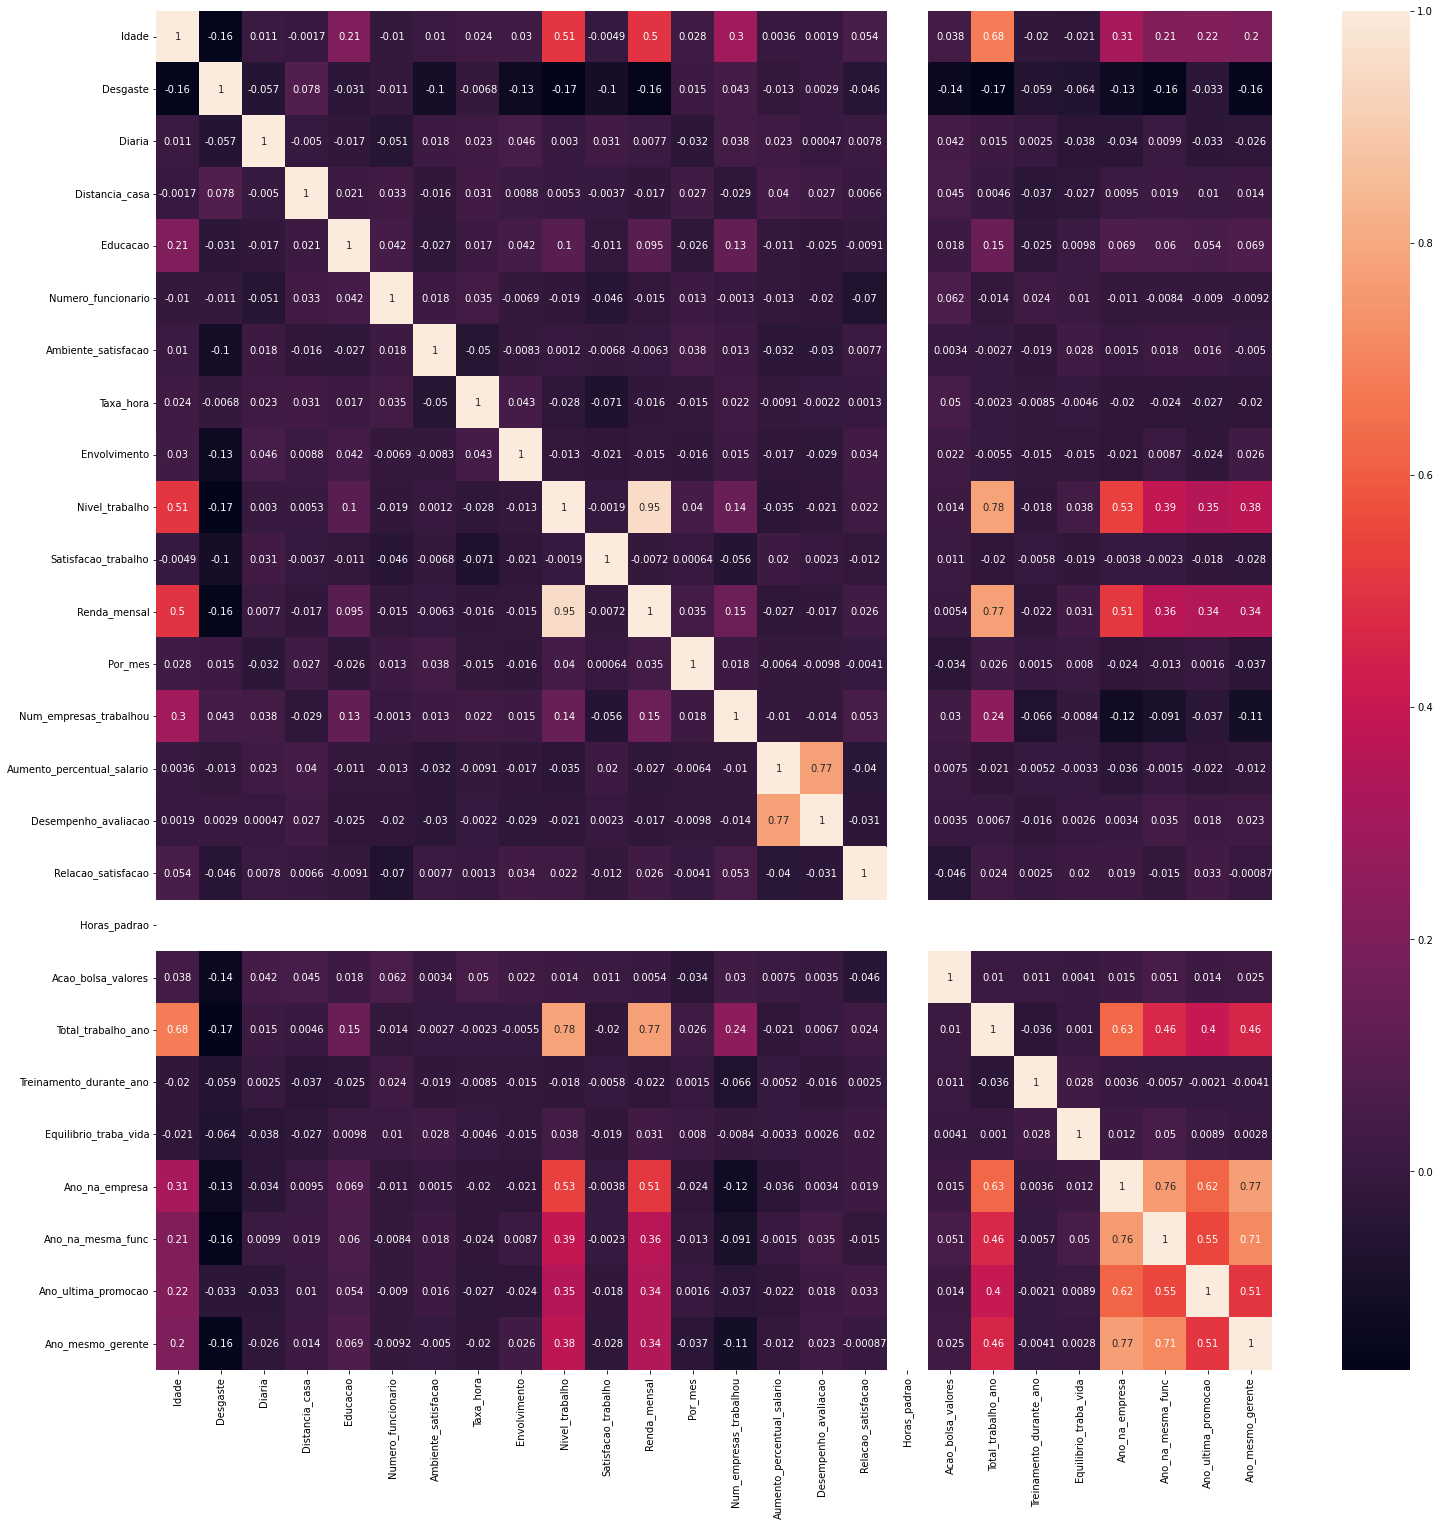

In [179]:

correlacao = rh.corr()
f, ax = plt.subplots(figsize = (25,25))
sns.heatmap(correlacao, annot=True)

In [180]:
# Calculo estátistico que vai comparar todos os atributosa do dataFrame exemplo: Idade/Desgaste/Diaria.... 
# retorna entre 0 e 1 e quanto mais proximo de 1 mais estão relacionados
correlacao #matriz

,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
Idade,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Desgaste,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Diaria,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Distancia_casa,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Educacao,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
Numero_funcionario,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
Ambiente_satisfacao,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Taxa_hora,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
Envolvimento,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
Nivel_trabalho,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# **Gráficos de contagens**

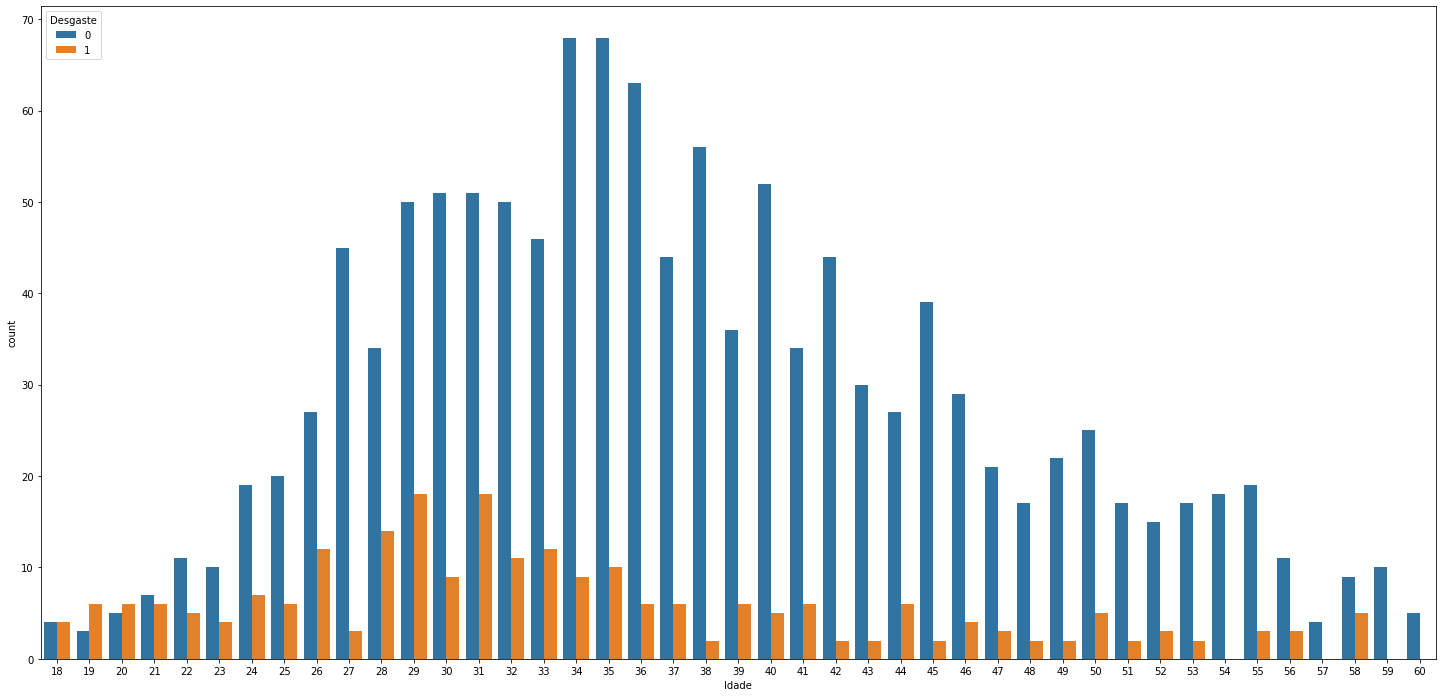

In [181]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Idade', hue= 'Desgaste', data=rh);
# Agrupamento de pessoas que ficam e se estabilizam e pessoas que saem 0 é a idade e 1 significa a relação se a pessoa fica ou sai

In [182]:
rh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Idade                       1470 non-null   int64 
 1   Desgaste                    1470 non-null   int64 
 2   Viagem_negocio              1470 non-null   object
 3   Diaria                      1470 non-null   int64 
 4   Departamento                1470 non-null   object
 5   Distancia_casa              1470 non-null   int64 
 6   Educacao                    1470 non-null   int64 
 7   Campo_educacao              1470 non-null   object
 8   Numero_funcionario          1470 non-null   int64 
 9   Ambiente_satisfacao         1470 non-null   int64 
 10  Genero                      1470 non-null   object
 11  Taxa_hora                   1470 non-null   int64 
 12  Envolvimento                1470 non-null   int64 
 13  Nivel_trabalho              1470 non-null   int6

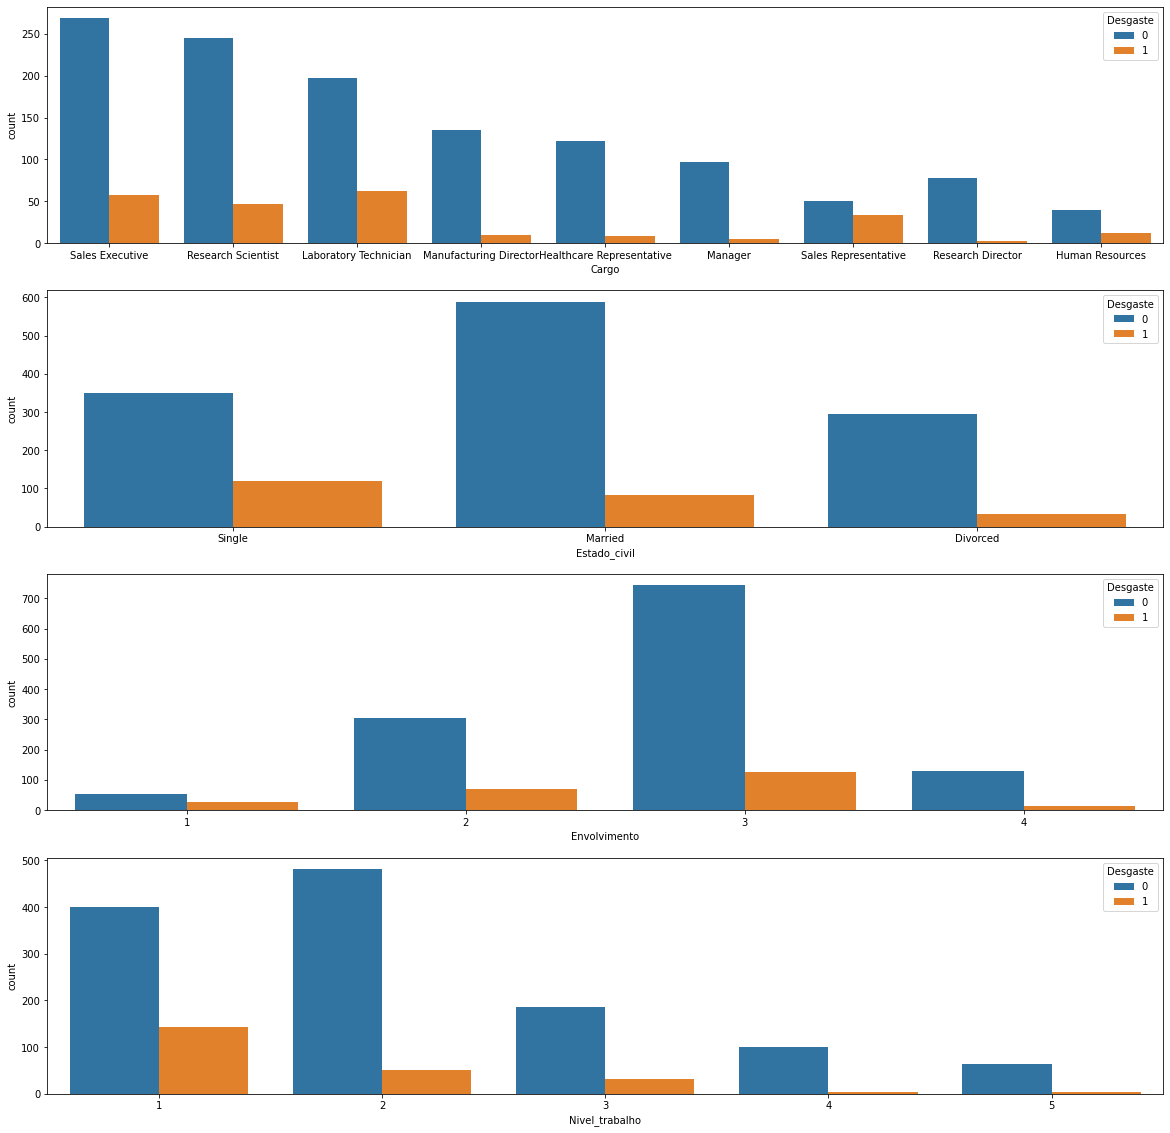

In [183]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Cargo', hue ='Desgaste', data=rh)
plt.subplot(412)
sns.countplot(x = 'Estado_civil', hue ='Desgaste', data=rh)
plt.subplot(413)
sns.countplot(x = 'Envolvimento', hue ='Desgaste', data=rh)
plt.subplot(414)
sns.countplot(x = 'Nivel_trabalho', hue ='Desgaste', data=rh)
# nuemro 411 o 4 representa a linha 1 coluna e 1 é o id do gráfico 
# 0 seria o cargo e o 1 representa a saída do profissinal da empresa

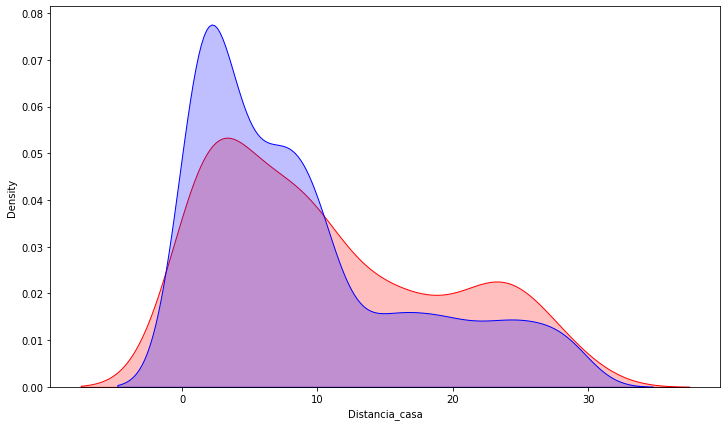

In [184]:
from seaborn.distributions import kdeplot
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(sairam['Distancia_casa'], label= 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram['Distancia_casa'], label= 'Funcionários que ficaram', shade = True, color = 'b')

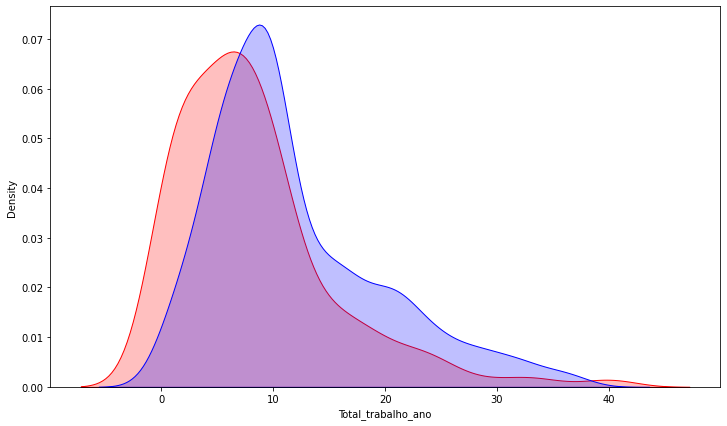

In [185]:
plt.figure(figsize=(12,7))
sns.kdeplot(sairam['Total_trabalho_ano'], label= 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram['Total_trabalho_ano'], label= 'Funcionários que ficaram', shade = True, color = 'b')

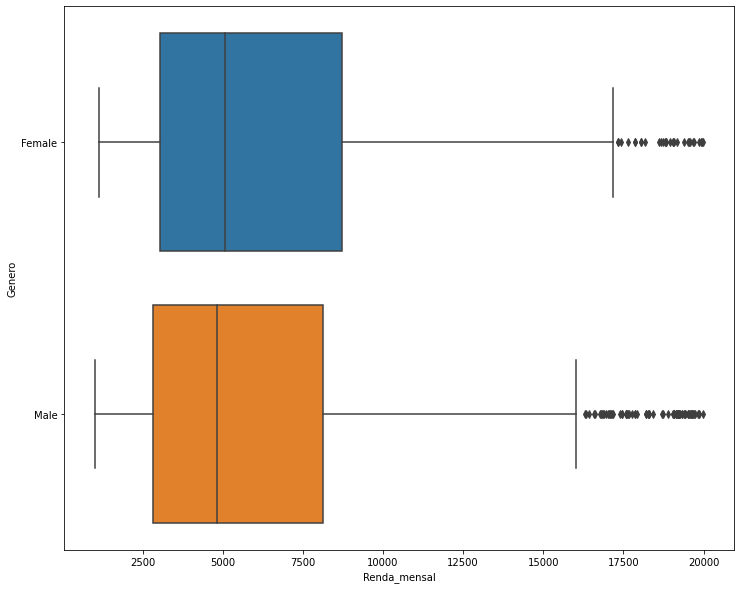

In [186]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Renda_mensal', y ='Genero', data=rh)

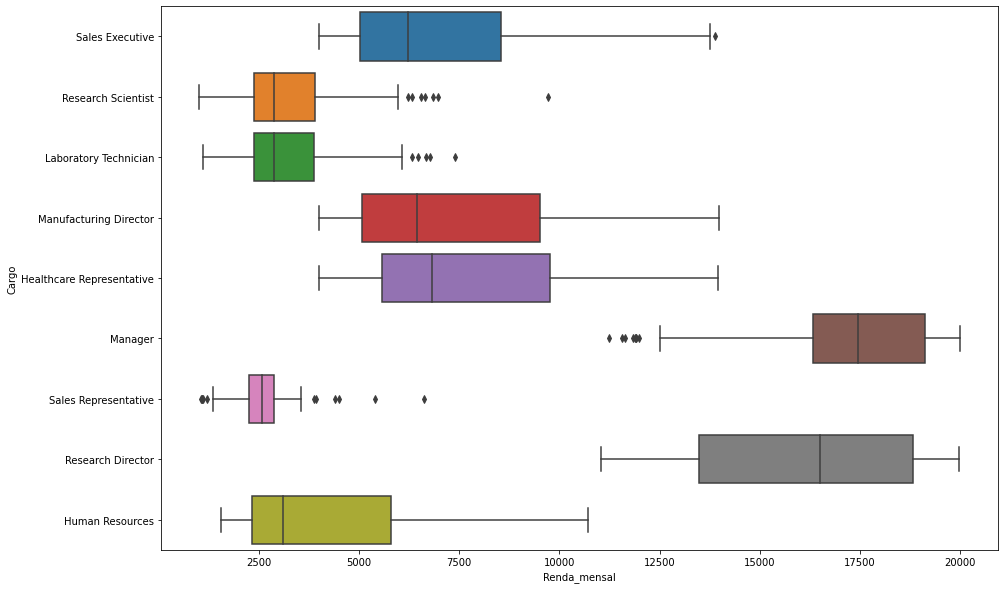

In [187]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Renda_mensal', y = 'Cargo', data= rh)

# Pré-processamento e base de treinamento/Testes

In [188]:
rh.head()

,Idade,Desgaste,Viagem_negocio,Diaria,Departamento,Distancia_casa,Educacao,Campo_educacao,Numero_funcionario,Ambiente_satisfacao,Genero,Taxa_hora,Envolvimento,Nivel_trabalho,Cargo,Satisfacao_trabalho,Estado_civil,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [189]:
X_cat = rh[['Viagem_negocio', 'Departamento', 'Campo_educacao', 'Genero', 'Cargo', 'Estado_civil']]
X_cat

,Viagem_negocio,Departamento,Campo_educacao,Genero,Cargo,Estado_civil
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [190]:
# Male Famale
#  1     0
#  0     1

# Single Married Divorced
#   1      0        0
#   0      1        0
#   0      0        1
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [191]:
type(X_cat)


numpy.ndarray

In [192]:
X_cat = pd.DataFrame(X_cat)

In [193]:
X_numerical = rh[['Idade', 'Desgaste', 'Diaria', 'Distancia_casa', 'Educacao', 'Numero_funcionario',	'Ambiente_satisfacao', 'Taxa_hora',	'Envolvimento',	'Nivel_trabalho', 'Satisfacao_trabalho',  'Renda_mensal',	'Por_mes', 'Num_empresas_trabalhou',	'Aumento_percentual_salario',	'Desempenho_avaliacao',	'Relacao_satisfacao',	'Horas_padrao',	'Acao_bolsa_valores',	'Total_trabalho_ano',	'Treinamento_durante_ano',	'Equilibrio_traba_vida',	'Ano_na_empresa',	'Ano_na_mesma_func',	'Ano_ultima_promocao',	'Ano_mesmo_gerente']]
X_numerical

,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [194]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [195]:
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,0,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,0,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,0,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,0,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [196]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [197]:
y = rh['Desgaste']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Desgaste, Length: 1470, dtype: int64

In [198]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [199]:
X_train.shape, y_train

((1102, 52), 82      0
 915     1
 826     0
 1304    0
 532     0
        ..
 803     0
 979     0
 549     0
 262     0
 1439    0
 Name: Desgaste, Length: 1102, dtype: int64)

In [200]:
X_test.shape, y_test

((368, 52), 127     1
 586     0
 1014    0
 80      0
 1223    1
        ..
 1370    0
 322     0
 1414    0
 241     0
 1056    1
 Name: Desgaste, Length: 368, dtype: int64)

# Regressão Logística

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
logistic = LogisticRegression()

In [203]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [204]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [205]:
y_test

127     1
586     0
1014    0
80      0
1223    1
       ..
1370    0
322     0
1414    0
241     0
1056    1
Name: Desgaste, Length: 368, dtype: int64

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [207]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[291,   0],
       [  0,  77]])

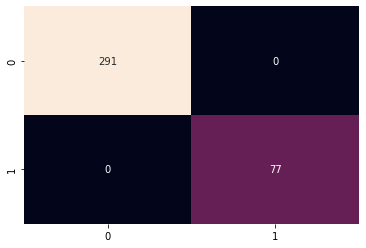

In [208]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False, yticklabels=True)

In [209]:
#Precision
23 / (23 + 3)

0.8846153846153846

In [210]:
#Recall
50 / (50 +0)

1.0

In [211]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score


In [212]:
precision_score(y_test, y_pred)

1.0

In [213]:
recall_score(y_test, y_pred)

1.0

In [214]:
f1_score(y_test, y_pred)

1.0

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00        77

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



# Curva Roc Regressão Logística

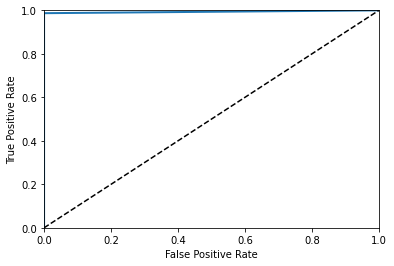

In [236]:
# CURVA ROC: calcula fpr e tpr para vários limiares, Verificar a quantidade de acertos e erros.
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)
y_scores = cross_val_predict(logistic, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

# Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [218]:
y_pred= forest.predict(X_test)

In [219]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [220]:
accuracy_score(y_test, y_pred)

1.0

In [221]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[291,   0],
       [  0,  77]])

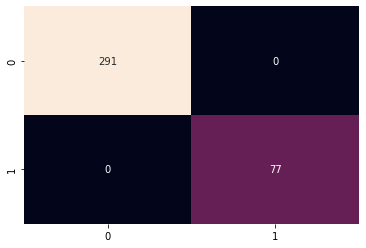

In [222]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False, yticklabels=True)

In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00        77

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



###**texto em negrito** Salvando o Classificador

In [237]:
import pickle

In [239]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)

In [247]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [241]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [244]:
X_novo = rh.iloc[0:1]
X_novo

,Idade,Desgaste,Viagem_negocio,Diaria,Departamento,Distancia_casa,Educacao,Campo_educacao,Numero_funcionario,Ambiente_satisfacao,Genero,Taxa_hora,Envolvimento,Nivel_trabalho,Cargo,Satisfacao_trabalho,Estado_civil,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5


In [248]:
X_cat_novo = X_novo[['Viagem_negocio', 'Departamento', 'Campo_educacao', 'Genero', 'Cargo', 'Estado_civil']]
X_cat_novo

,Viagem_negocio,Departamento,Campo_educacao,Genero,Cargo,Estado_civil
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [249]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [250]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [251]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [252]:
X_numerical_novo = X_novo[['Idade', 'Desgaste', 'Diaria', 'Distancia_casa', 'Educacao', 'Numero_funcionario',	'Ambiente_satisfacao', 'Taxa_hora',	'Envolvimento',	'Nivel_trabalho', 'Satisfacao_trabalho',  'Renda_mensal',	'Por_mes', 'Num_empresas_trabalhou',	'Aumento_percentual_salario',	'Desempenho_avaliacao',	'Relacao_satisfacao',	'Horas_padrao',	'Acao_bolsa_valores',	'Total_trabalho_ano',	'Treinamento_durante_ano',	'Equilibrio_traba_vida',	'Ano_na_empresa',	'Ano_na_mesma_func',	'Ano_ultima_promocao',	'Ano_mesmo_gerente']]
X_numerical_novo

,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5


In [253]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis= 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Idade,Desgaste,Diaria,Distancia_casa,Educacao,Numero_funcionario,Ambiente_satisfacao,Taxa_hora,Envolvimento,Nivel_trabalho,Satisfacao_trabalho,Renda_mensal,Por_mes,Num_empresas_trabalhou,Aumento_percentual_salario,Desempenho_avaliacao,Relacao_satisfacao,Horas_padrao,Acao_bolsa_valores,Total_trabalho_ano,Treinamento_durante_ano,Equilibrio_traba_vida,Ano_na_empresa,Ano_na_mesma_func,Ano_ultima_promocao,Ano_mesmo_gerente
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5


In [255]:
X_novo = min_max.transform(X_all_novo)
X_novo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 1.        , 0.71581961, 0.        ,
        0.25      , 0.        , 0.33333333, 0.91428571, 0.66666667,
        0.25      , 1.        , 0.26245392, 0.6980526 , 0.88888889,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2       , 0.        , 0.        , 0.15      , 0.22222222,
        0.        , 0.29411765]])

In [256]:
model.predict(X_novo)

array([1])

In [257]:
model.predict_proba(X_novo)

array([[0.04029534, 0.95970466]])

In [258]:
model.classes_

array([0, 1])